In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import math
import scipy.stats
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi']= 100

# infoShare ACADEMY, JDSZR6 (2022)
## Project II _(python)_ World-Data-Analysis
## _Stroke prediction application_

### Angelika P., Błażej R., Hubert S., Jonasz K.
---
**Introduction**

We search the database information in order to develop an application predicting stroke.
In relation to User's input we check this specific health disease probability
> _Watch out for wild snakes!_

`Python`

**Data analysis**

- data review
- data cleaning
- correlation check
- detail anaylisis

**Probability**

Algorithm evaluating the stroke prediction chance established.

**Application**

HMI developped to collect the User's input, look through & filter the dataset, calculate and provide a report.

---

Basis:
[link to the data source (kaggle dataset)](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

_go ahead and check your condition!_

**live long, take care and enjoy our application**

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
ges = gender_series = df["gender"]
ags = age_series = df["age"]
hts = hypertension_series = df["hypertension"]
hds = heart_disease_series = df["heart_disease"]
ems = ever_married_series = df["ever_married"]
ske = stroke_series = df["stroke"]

### Regarding the Stroke itself, without going into the relationship with other factors yet:

In [7]:
df[["stroke"]].describe()

,stroke
count,5110.000000
mean,0.048728
std,0.215320
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
isstroke = df[df["stroke"] == 1 ].count()
isstroke_perc = round((isstroke[0] * 100 / ges.count()),2)
isntstroke = df[df["stroke"] == 0 ].count()
isntstroke_perc = round((isntstroke[0] * 100 / ges.count()),2)

In [9]:
print(f"The Stroke is recognized in {isstroke[0]} patients ({isstroke_perc}%), \n{isntstroke[0]} patients ({isntstroke_perc}%) free of this disease.")

The Stroke is recognized in 249 patients (4.87%), 
4861 patients (95.13%) free of this disease.


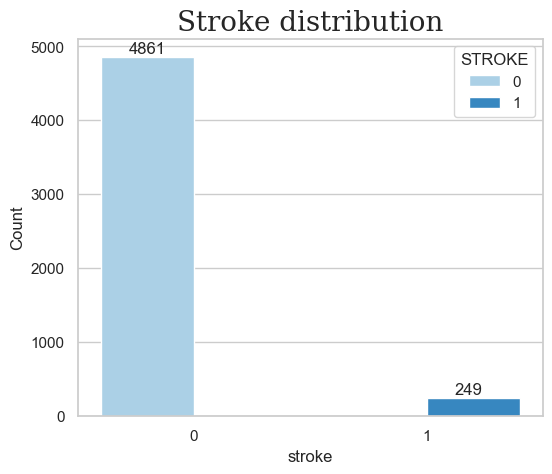

In [10]:
plt.figure(figsize=(6,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='stroke',data=df, palette='Blues',hue='stroke', saturation = 2.5)
plt.title("Stroke distribution", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))

ax.set(ylabel = "Count")
pass

#### Assessment of the suitability of the columns.
Checking the correlation of individual columns with the occurrence of stroke:

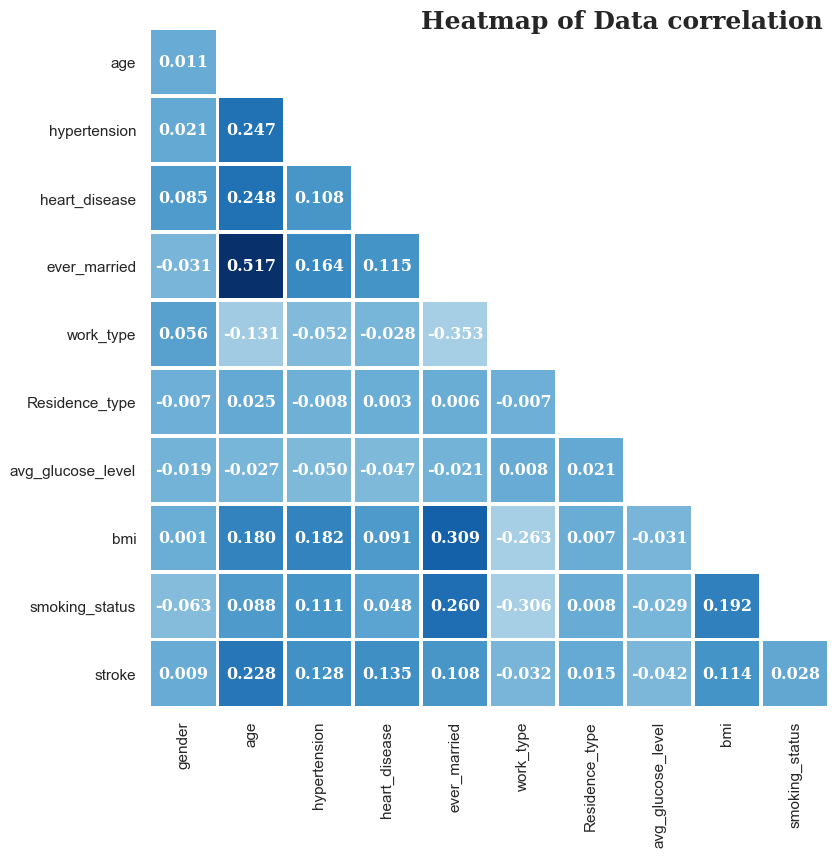

In [11]:
le = preprocessing.LabelEncoder()

plt.figure(figsize=(9,9))
df_copy1 = df.copy()
objList = df_copy1.select_dtypes(include = "object").columns
for col in df_copy1.columns:
    df_copy1[col] = le.fit_transform(df_copy1[col].astype(str))
df_corr = df_copy1.corr()
mask = np.triu(np.ones_like(df_corr))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".3f", cmap = 'Blues', center = 0,
           vmin=-0.15, vmax=0.5, cbar = False,
           linewidth = 2, square = True, annot_kws = {'font':'serif', 'size':11.5, 'color':'white', 'fontweight':'bold'} )
plt.text(4,0,'Heatmap of Data correlation',fontsize=18,fontweight='bold',fontfamily='serif')
pass

# Basic data in columns, their influence on stroke

## 1. "gender"

In [12]:
df[["gender"]].describe()

,gender
count,5110
unique,3
top,Female
freq,2994


In [13]:
set(df["gender"])

{'Female', 'Male', 'Other'}

In [14]:
female = df[df["gender"]=="Female"].count()
fem_perc = round((female[0] * 100 / ges.count()),2)
femudar = df[(df["gender"] == "Female") & (df["stroke"] == 1)].count()
femudar_perc = round((femudar[0] * 100 / female[0]),2)

male = df[df["gender"]=="Male"].count()
mal_perc = round((male[0] * 100 / ges.count()),2)
maludar = df[(df["gender"] == "Male") & (df["stroke"] == 1)].count()
maludar_perc = round((maludar[0] * 100 / male[0]),2)

other = df[df["gender"]=="Other"].count()
other_perc = round((other[0] * 100 / ges.count()),2)
otherudar = df[(df["gender"] == "Other") & (df["stroke"] == 1)].count()
otherudar_perc = round((otherudar[0] * 100 / other[0]),2)

In [15]:
print(f"There are {female[0]} women in dataset ({fem_perc}% of all).")
print(f"    {femudar[0]} of them experienced Stroke ({femudar_perc}%).")
print(f"There are {male[0]} men in data set ({mal_perc}% of all).")
print(f"    {maludar[0]} of them experienced Stroke ({maludar_perc}%).")
print(f"Additionally there is {other[0]} person whose sex is unknown.")
if otherudar[0] == 0:
    print ("    This person didn't experience the Stroke.")
elif otherudar[0] == 1:
    print ("    This person experienced the Stroke.")   
else:
    print(f"    {otherudar[0]} of them experienced the Stroke ({otherudar_perc}%).")

There are 2994 women in dataset (58.59% of all).
    141 of them experienced Stroke (4.71%).
There are 2115 men in data set (41.39% of all).
    108 of them experienced Stroke (5.11%).
Additionally there is 1 person whose sex is unknown.
    This person didn't experience the Stroke.


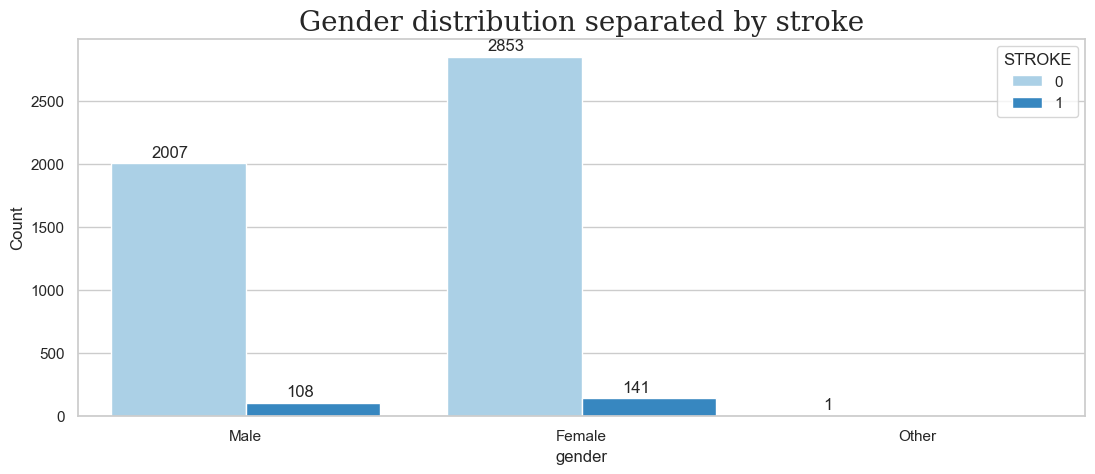

In [16]:
plt.figure(figsize=(13,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='gender',data=df, palette='Blues',hue='stroke', saturation =2.5)
plt.title("Gender distribution separated by stroke", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))

ax.set(ylabel = "Count")
pass

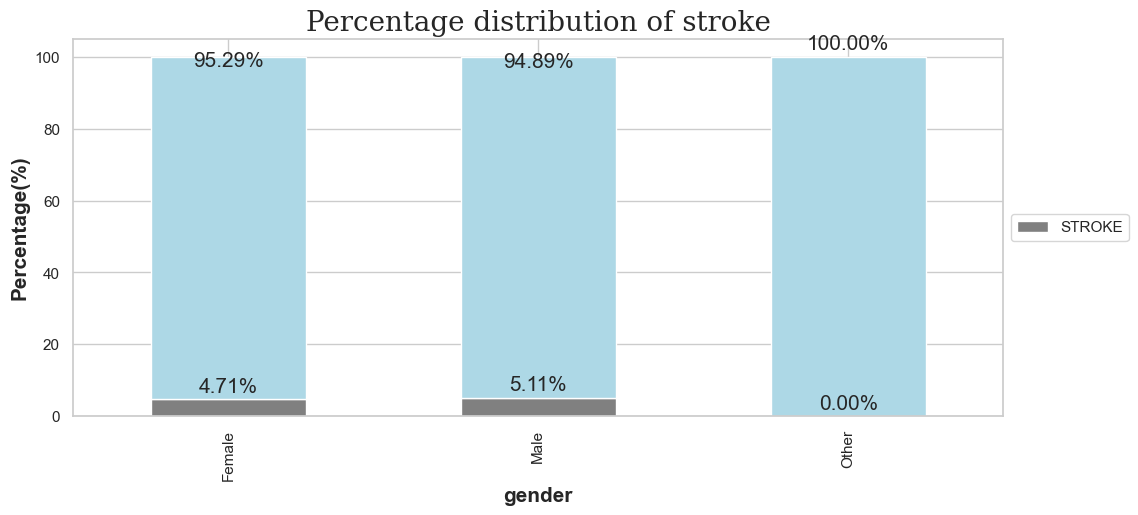

In [17]:
gen_file = pd.crosstab(df['gender'], df['stroke'] == 0)
stacked_data_gen = gen_file.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")
ax = stacked_data_gen.plot(kind="bar", stacked=True, figsize = (12,5), color= ("grey", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize = 20, fontfamily='serif')
plt.xlabel("gender", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    percentage = "{0:0.2f}%".format(p.get_height())
    x = p.get_x() + 0.25
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

Graphic comparison of stroke probability in relation to hypertension occurence (density plot):

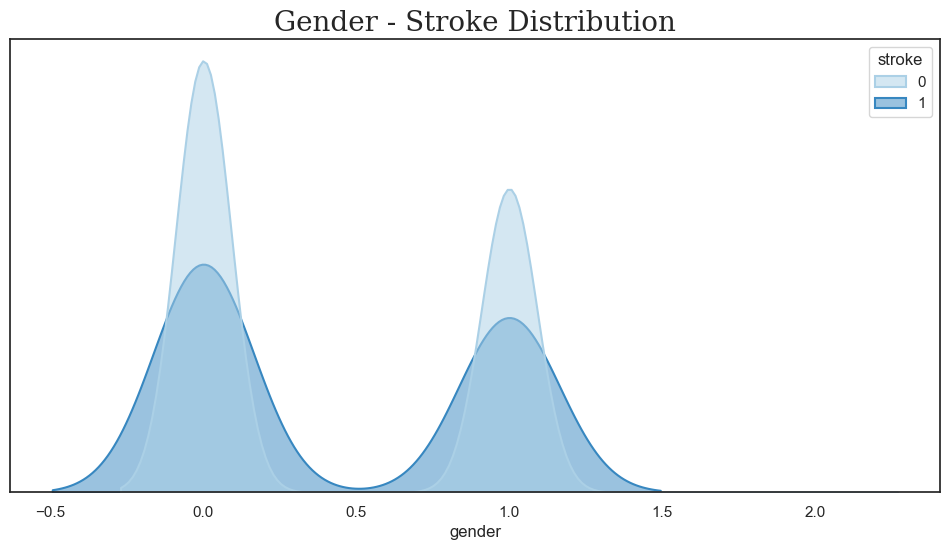

In [18]:
gender_to_plot = le.fit_transform(df["gender"])
plt.figure(figsize = (12,6))
sns.set_theme(style="white")
ax= sns.kdeplot(
   data=df, x=gender_to_plot, hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

#usuwanie osi y
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

plt.xlabel('gender')
plt.title('Gender - Stroke Distribution', fontsize = 20, fontfamily='serif')
pass

In [19]:
df_copy = df.copy()
gender_corr = np.corrcoef(le.fit_transform(df_copy["gender"]), df["stroke"]) 
print (f"Correlation between sex and Stroke is very weak, calculated value: {round(gender_corr[1, 0], 4)}.")
print ("There is no great reason to take move variable into application as filtering factor; \nespecially, because her influence is relatively strong (it rejects ~half of available data).")

Correlation between sex and Stroke is very weak, calculated value: 0.0089.
There is no great reason to take move variable into application as filtering factor; 
especially, because her influence is relatively strong (it rejects ~half of available data).


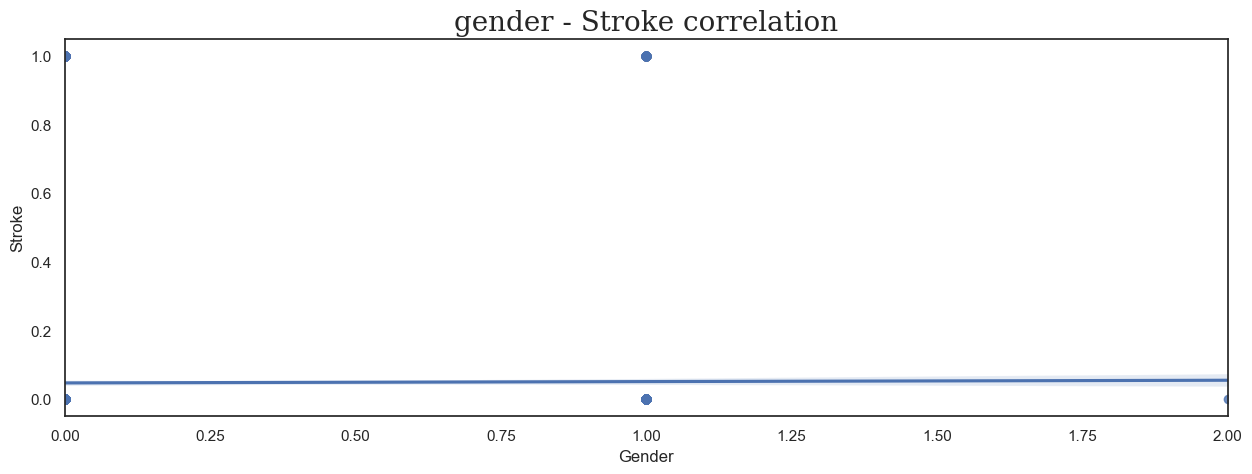

In [20]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x="gender", y="stroke", data=df_copy1)
plt.xlabel("Gender")
plt.ylabel("Stroke")
plt.title("gender - Stroke correlation", fontsize = 20, fontfamily = 'serif')
pass

## 2. "age"

In [21]:
df[["age"]].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


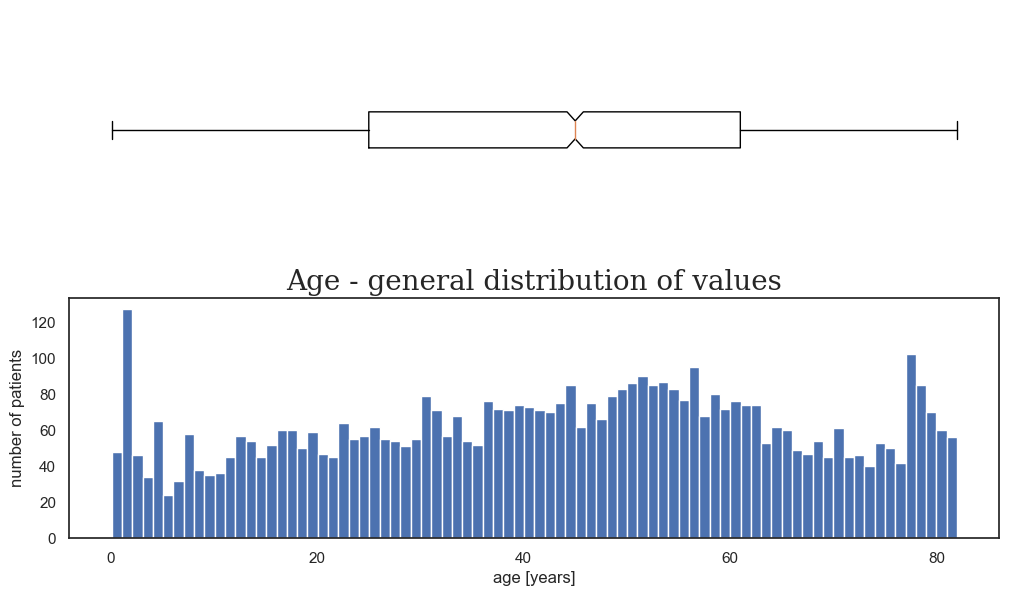

In [22]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,gridspec_kw={"height_ratios": (1, 1)}, figsize = (12,7))
ax_box.boxplot(ags,notch=True,vert=False)
ax_box.axis('off')
ax_hist.hist(ags, bins = 82)
plt.title("Age - general distribution of values", fontsize = 20, fontfamily='serif')
plt.xlabel("age [years]")
plt.ylabel("number of patients")
pass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


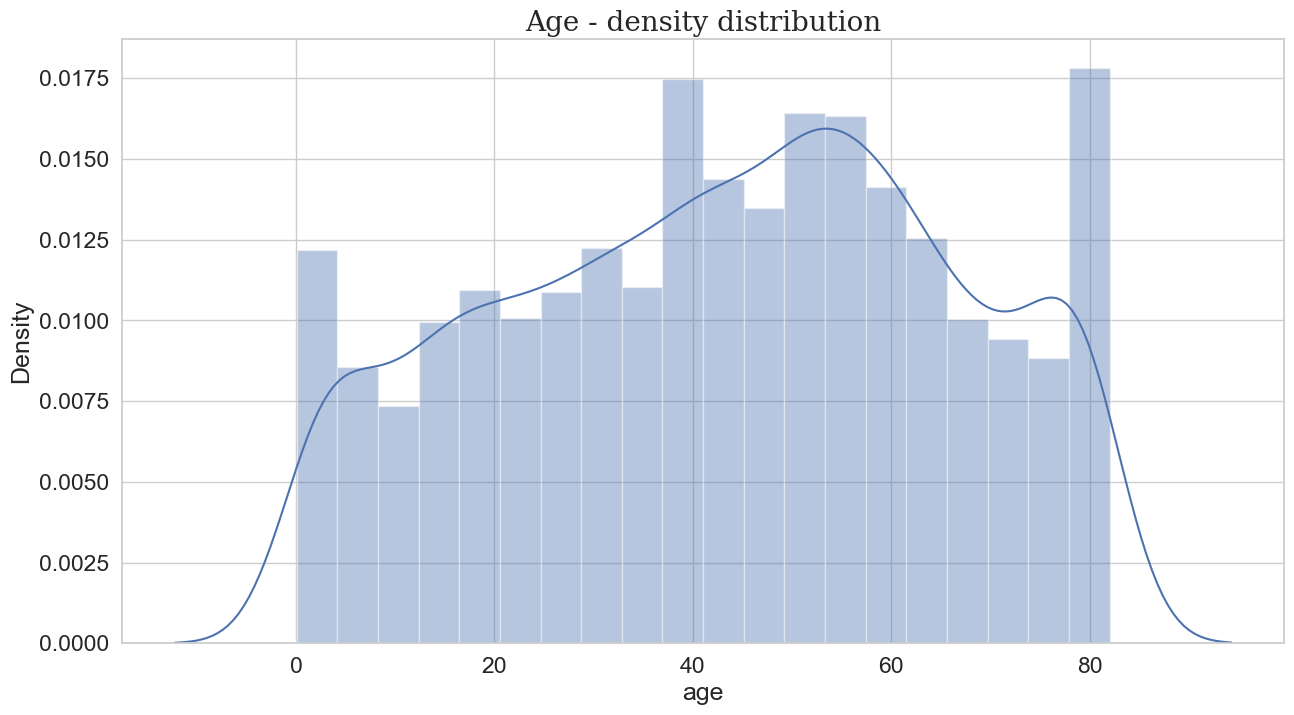

In [23]:

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid", font_scale=1.5)
sns.color_palette("Blues")
ax_hist = sns.distplot(ags, norm_hist=True)
ax.set_xlabel("age distribution", fontsize = 20)
ax.set_ylabel("density", fontsize = 20)
plt.title("Age - density distribution", fontsize = 20, fontfamily='serif')
pass

Multimodal distribution

In [24]:
niemowleta = df[df["age"] <= 1.99 ].count()
niemo_perc = round((niemowleta[0] * 100 / ges.count()),2)
niemoudar = df[(df["age"] <= 1.99) & (df["stroke"] == 1)].count()
niemoudar_perc = round((niemoudar[0] * 100 / niemowleta[0]),2)

male_dzieci = df[(df["age"] >= 2) & (df["age"] <= 4.99) ].count()
male_perc = round((male_dzieci[0] * 100 / ges.count()),2)
maleudar = df[(df["age"] >= 2) & (df["age"] <= 4.99) & (df["stroke"] == 1)].count()
maleudar_perc = round((maleudar[0] * 100 / male_dzieci[0]),2)

dzieci = df[(df["age"] >= 5) & (df["age"] <= 10.99) ].count()
dzieci_perc = round((dzieci[0] * 100 / ges.count()),2)
dzieciudar = df[(df["age"] >= 5) & (df["age"] <= 10.99) & (df["stroke"] == 1)].count()
dzieciudar_perc = round((dzieciudar[0] * 100 / dzieci[0]),2)

nastolatkowie = df[(df["age"] >= 11) & (df["age"] <= 17.99) ].count()
nasto_perc = round((nastolatkowie[0] * 100 / ges.count()),2)
nastoudar = df[(df["age"] >= 11) & (df["age"] <= 17.99) & (df["stroke"] == 1)].count()
nastoudar_perc = round((nastoudar[0] * 100 / nastolatkowie[0]),2)

dor20 = df[(df["age"] >= 18) & (df["age"] <= 29.99) ].count()
dor20_perc = round((dor20[0] * 100 / ges.count()),2)
dor20udar = df[(df["age"] >= 18) & (df["age"] <= 29.99) & (df["stroke"] == 1)].count()
dor20udar_perc = round((dor20udar[0] * 100 / dor20[0]),2)

dor30 = df[(df["age"] >= 30) & (df["age"] <= 39.99) ].count()
dor30_perc = round((dor30[0] * 100 / ges.count()),2)
dor30udar = df[(df["age"] >= 30) & (df["age"] <= 39.99) & (df["stroke"] == 1)].count()
dor30udar_perc = round((dor30udar[0] * 100 / dor30[0]),2)

dor40 = df[(df["age"] >= 40) & (df["age"] <= 49.99) ].count()
dor40_perc = round((dor40[0] * 100 / ges.count()),2)
dor40udar = df[(df["age"] >= 40) & (df["age"] <= 49.99) & (df["stroke"] == 1)].count()
dor40udar_perc = round((dor40udar[0] * 100 / dor40[0]),2)

dor50 = df[(df["age"] >= 50) & (df["age"] <= 59.99) ].count()
dor50_perc = round((dor50[0] * 100 / ges.count()),2)
dor50udar = df[(df["age"] >= 50) & (df["age"] <= 59.99) & (df["stroke"] == 1)].count()
dor50udar_perc = round((dor50udar[0] * 100 / dor50[0]),2)

dor60 = df[(df["age"] >= 60) & (df["age"] <= 69.99) ].count()
dor60_perc = round((dor60[0] * 100 / ges.count()),2)
dor60udar = df[(df["age"] >= 60) & (df["age"] <= 69.99) & (df["stroke"] == 1)].count()
dor60udar_perc = round((dor60udar[0] * 100 / dor60[0]),2)

dor70 = df[(df["age"] >= 70) & (df["age"] <= 79.99) ].count()
dor70_perc = round((dor70[0] * 100 / ges.count()),2)
dor70udar = df[(df["age"] >= 70) & (df["age"] <= 79.99) & (df["stroke"] == 1)].count()
dor70udar_perc = round((dor70udar[0] * 100 / dor70[0]),2)

seniors = df[df["age"] >= 80].count()
seniors_perc = round((seniors[0] * 100 / ges.count()),2)
seniorsudar = df[(df["age"] >= 80) & (df["stroke"] == 1)].count()
seniorsudar_perc = round((seniorsudar[0] * 100 / seniors[0]),2)

### relation with Stroke 

In [25]:
print("Dataset consists of: ")
print(f"{niemowleta[0]} infants 0-2 years ({niemo_perc}% patients)") 
print(f"    {niemoudar[0]} of them ({niemoudar_perc}%) experienced Stroke")
print(f"{male_dzieci[0]} young childrens up to 5 y.o. ({male_perc}%)")
print(f"    {maleudar[0]} of them ({maleudar_perc}%) experienced Stroke")
print(f"{dzieci[0]} childrens up to 11 y.o. ({dzieci_perc}%)")
print(f"    {dzieciudar[0]} of them ({dzieciudar_perc}%) experienced Stroke")
print(f"{nastolatkowie[0]} teenagers up to 18 y.o. ({nasto_perc}%)")
print(f"    {nastoudar[0]} of them ({nastoudar_perc}%) experienced Stroke")
print(f"{dor20[0]} twenty-year-olds ({dor20_perc}%)")
print(f"    {dor20udar[0]} of them ({dor20udar_perc}%) experienced Stroke")
print(f"{dor30[0]} thirty-year-olds ({dor30_perc}%)")
print(f"    {dor30udar[0]} of them ({dor30udar_perc}%) experienced Stroke")
print(f"{dor40[0]} fourty-year-olds ({dor40_perc}%)")
print(f"    {dor40udar[0]} of them ({dor40udar_perc}%) experienced Stroke")
print(f"{dor50[0]} fifty-year-olds ({dor50_perc}%)")
print(f"    {dor50udar[0]} of them ({dor50udar_perc}%) experienced Stroke")
print(f"{dor60[0]} sixty-year-olds ({dor60_perc}%)")
print(f"    {dor60udar[0]} of them ({dor60udar_perc}%) experienced Stroke")
print(f"{dor70[0]} seventy-year-olds ({dor70_perc}%)")
print(f"    {dor70udar[0]} of them ({dor70udar_perc}%) experienced Stroke")
print(f"{seniors[0]} seniors ({seniors_perc}%)")
print(f"    {seniorsudar[0]} of them ({seniorsudar_perc}%) experienced Stroke")

Dataset consists of: 
120 infants 0-2 years (2.35% patients)
    1 of them (0.83%) experienced Stroke
135 young childrens up to 5 y.o. (2.64%)
    0 of them (0.0%) experienced Stroke
252 childrens up to 11 y.o. (4.93%)
    0 of them (0.0%) experienced Stroke
349 teenagers up to 18 y.o. (6.83%)
    1 of them (0.29%) experienced Stroke
659 twenty-year-olds (12.9%)
    0 of them (0.0%) experienced Stroke
655 thirty-year-olds (12.82%)
    6 of them (0.92%) experienced Stroke
730 fourty-year-olds (14.29%)
    12 of them (1.64%) experienced Stroke
834 fifty-year-olds (16.32%)
    48 of them (5.76%) experienced Stroke
621 sixty-year-olds (12.15%)
    47 of them (7.57%) experienced Stroke
569 seventy-year-olds (11.14%)
    94 of them (16.52%) experienced Stroke
186 seniors (3.64%)
    40 of them (21.51%) experienced Stroke


In [26]:
df_copy2 = df.copy()

In [27]:
df_copy2.loc[df["age"] <= 1.99, "age group"] = "infants"
df_copy2.loc[(df["age"] >= 2) & (df["age"] <= 4.99), "age group"] = "young childrens"
df_copy2.loc[(df["age"] >= 5) & (df["age"] <= 10.99), "age group"] = "childrens"
df_copy2.loc[(df["age"] >= 11) & (df["age"] <= 17.99), "age group"] = "teenagers"
df_copy2.loc[(df["age"] >= 18) & (df["age"] <= 29.99), "age group"] = "20-Y-Olders"
df_copy2.loc[(df["age"] >= 30) & (df["age"] <= 39.99), "age group"] = "30-Y-Olders"
df_copy2.loc[(df["age"] >= 40) & (df["age"] <= 49.99), "age group"] = "40-Y-Olders"
df_copy2.loc[(df["age"] >= 50) & (df["age"] <= 59.99), "age group"] = "50-Y-Olders"
df_copy2.loc[(df["age"] >= 60) & (df["age"] <= 69.99), "age group"] = "60-Y-Olders"
df_copy2.loc[(df["age"] >= 70) & (df["age"] <= 79.99), "age group"] = "70-Y-Olders"
df_copy2.loc[(df["age"] >= 80), "age group"] = "seniors"

In [28]:
age_for_plot = df_copy2.sort_values(["age"])

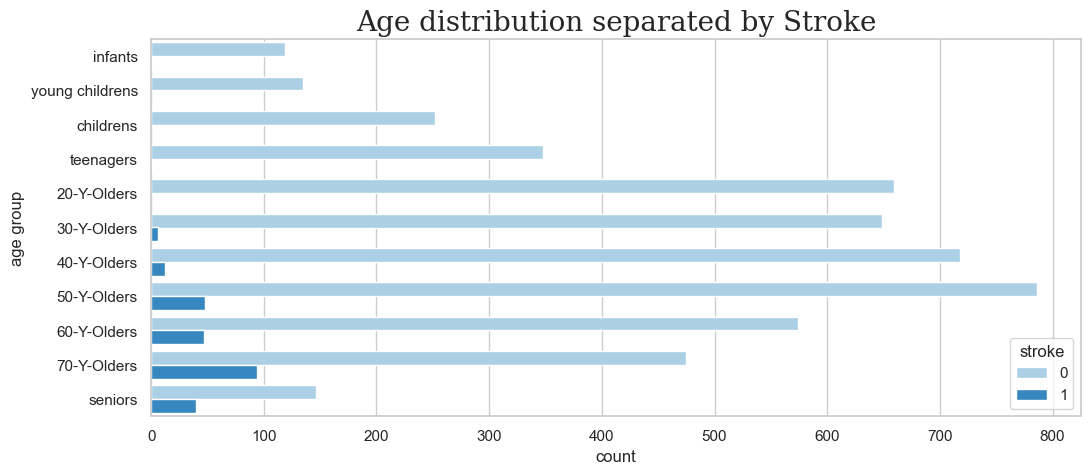

In [29]:
plt.figure(figsize = (12,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="age group", data=age_for_plot, palette="Blues", hue= 'stroke', saturation =2.5)
plt.title("Age distribution separated by Stroke", fontsize = 20, fontfamily='serif')
#for p in ax.patches:
#        ax.annotate('{}'.format(p.get_height()), (p.get_x()+.15, p.get_height()))
pass

In [30]:
df_copy3 = age_for_plot.copy()

In [31]:
df_copy3.loc[(age_for_plot["age group"] == "infants"), "age group"] = "a) infants"
df_copy3.loc[(age_for_plot["age group"] == "young childrens"), "age group"] = "b) young childrens"
df_copy3.loc[(age_for_plot["age group"] == "childrens"), "age group"] = "c) childrens"
df_copy3.loc[(age_for_plot["age group"] == "teenagers"), "age group"] = "d) teenagers"
df_copy3.loc[(age_for_plot["age group"] == "20-Y-Olders"), "age group"] = "e) 20-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "30-Y-Olders"), "age group"] = "f) 30-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "40-Y-Olders"), "age group"] = "g) 40-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "50-Y-Olders"), "age group"] = "h) 50-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "60-Y-Olders"), "age group"] = "i) 60-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "70-Y-Olders"), "age group"] = "j) 70-Y-Olders"
df_copy3.loc[(age_for_plot["age group"] == "seniors"), "age group"] = "k) seniors"

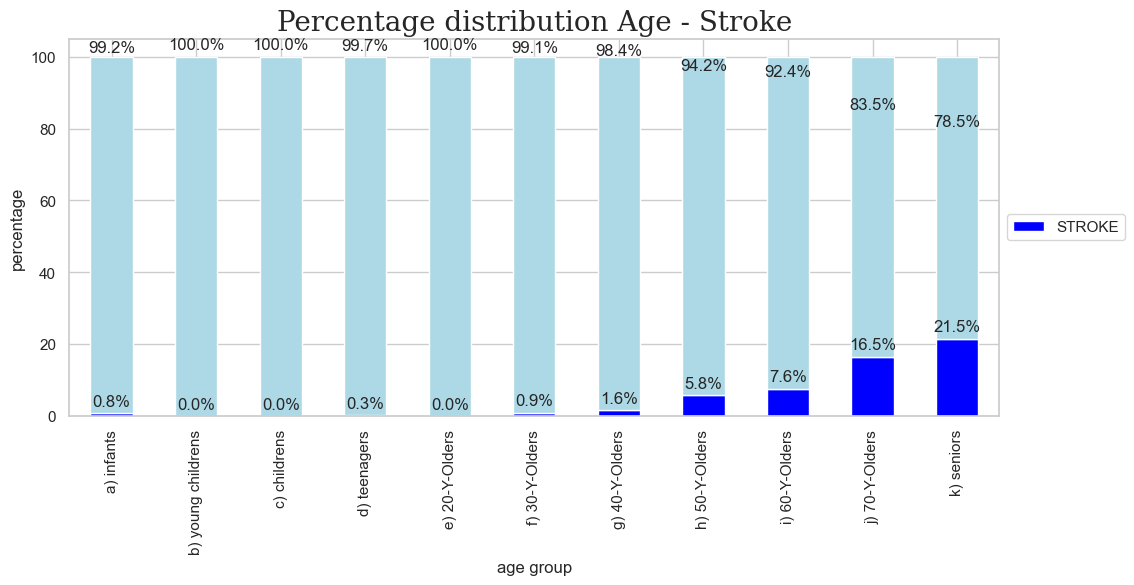

In [32]:
a = np.array(df_copy3["age group"], dtype=object)
b = np.array(df_copy3["stroke"], dtype=object)
age_file = pd.crosstab(a, b == 0, rownames=['a'], colnames=['b'])
stacked_data_age = age_file.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")
ax = stacked_data_age.plot(kind="bar", stacked=True, figsize = (12,5), color= ("blue", "lightblue"))
plt.xlabel("age group")
plt.ylabel("percentage")
plt.title("Percentage distribution Age - Stroke", fontsize = 20, fontfamily='serif')
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    percentage = "{0:0.1f}%".format(p.get_height())
    x = p.get_x() + 0.25
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 12)

Graphic comparison of stroke probability in relation to age of patient (density plot):

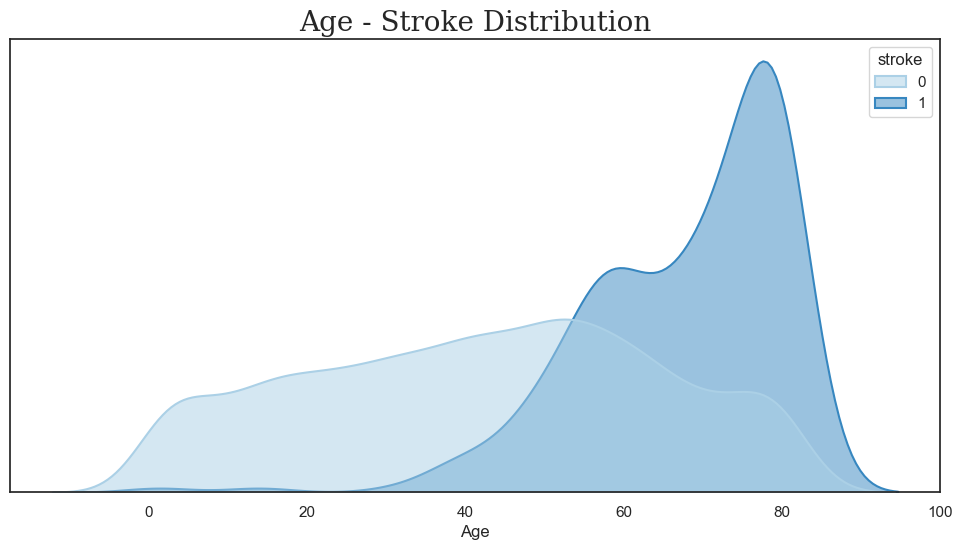

In [33]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white")
ax= sns.kdeplot(
   data=df, x="age", hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

#usuwanie osi y
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

plt.xlabel('Age')
plt.title('Age - Stroke Distribution', fontsize = 20, fontfamily='serif')
pass

In [34]:
age_corr = np.corrcoef(le.fit_transform(df_copy1["age"]), df["stroke"]) 
print (f"Calculated correlation between Age and Stroke:  {round(age_corr[1, 0], 4)}.")
print ("This variable has the stronger influence on Stroke occurence.")

Calculated correlation between Age and Stroke:  0.2284.
This variable has the stronger influence on Stroke occurence.


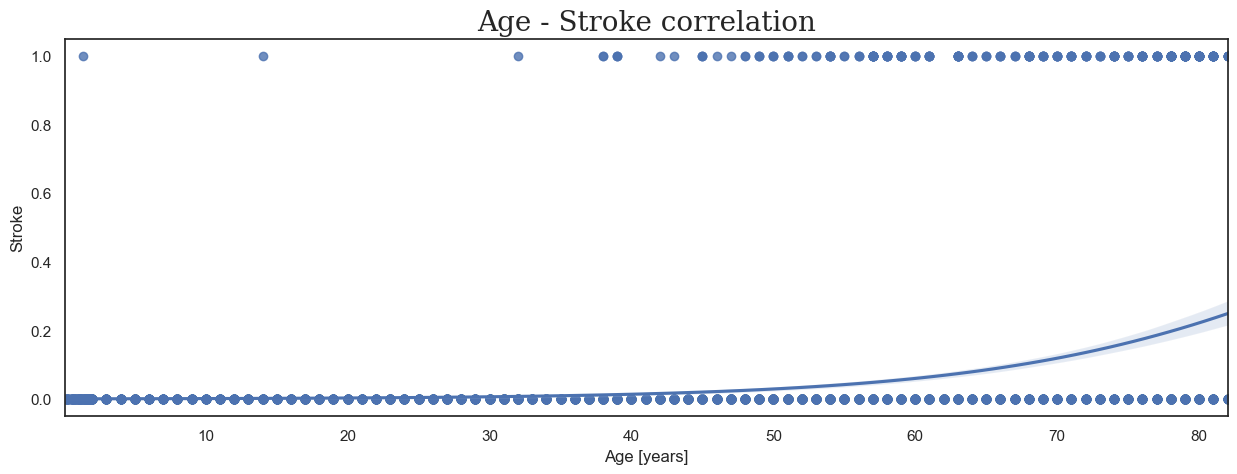

In [35]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x="age", y="stroke", data=df, logistic=True)
plt.xlabel("Age [years]")
plt.ylabel("Stroke")
plt.title("Age - Stroke correlation", fontsize = 20, fontfamily = 'serif')
pass

## 3. "hypertension"

In [36]:
df[["hypertension"]].describe()

,hypertension
count,5110.000000
mean,0.097456
std,0.296607
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [37]:
ishyper = df[df["hypertension"] == 1 ].count()
ishyper_perc = round((ishyper[0] * 100 / ges.count()),2)
isnthyper = df[df["hypertension"] == 0 ].count()
isnthyper_perc = round((isnthyper[0] * 100 / ges.count()),2)

In [38]:
print(f"Hypertension is noticed in {ishyper[0]} patients ({ishyper_perc}% of total)")
print(f"{isnthyper[0]} patients ({isnthyper_perc}%) do not have such disease.")


Hypertension is noticed in 498 patients (9.75% of total)
4612 patients (90.25%) do not have such disease.


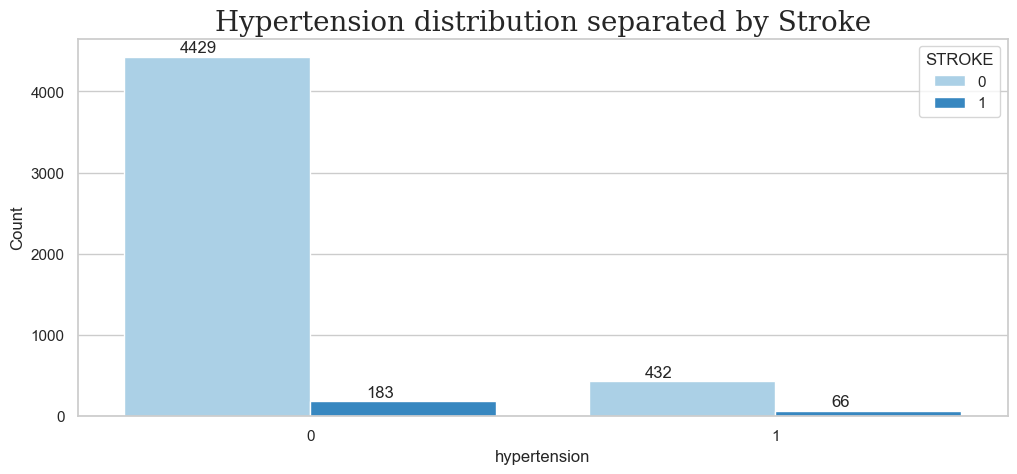

In [39]:
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='hypertension',data=df, palette='Blues',hue='stroke', saturation =2.5)
plt.title("Hypertension distribution separated by Stroke", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))

ax.set(ylabel = "Count")
pass

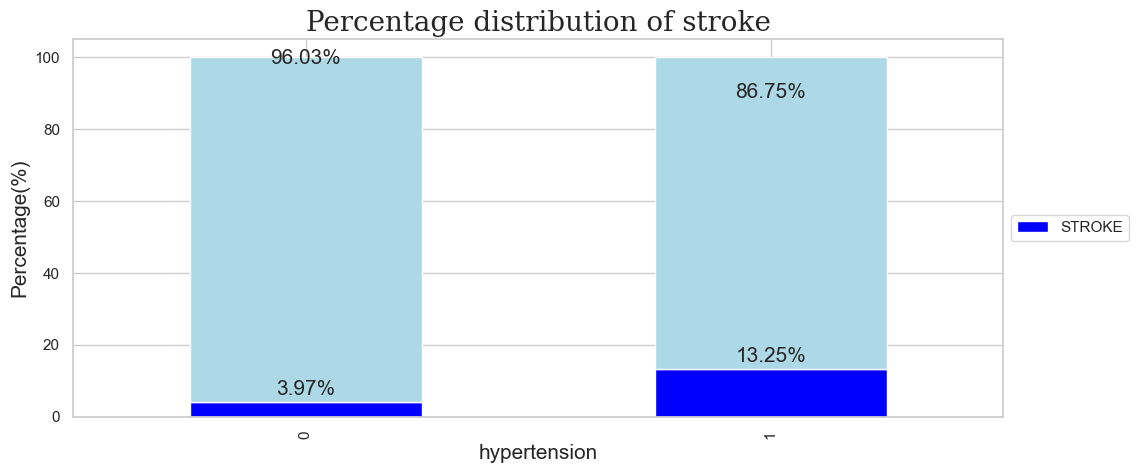

In [40]:
hy_file = pd.crosstab(df['hypertension'], df['stroke'] == 0)
stacked_data_hy = hy_file.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")
ax = stacked_data_hy.plot(kind="bar", stacked=True, figsize = (12,5), color= ("blue", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20, fontfamily = 'serif')
plt.xlabel("hypertension", fontsize = 15)
plt.ylabel("Percentage(%)", fontsize = 15)
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    percentage = "{0:0.2f}%".format(p.get_height())
    x = p.get_x() + 0.25
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

Graphic comparison of stroke probability in relation to hypertension occurence (density plot):

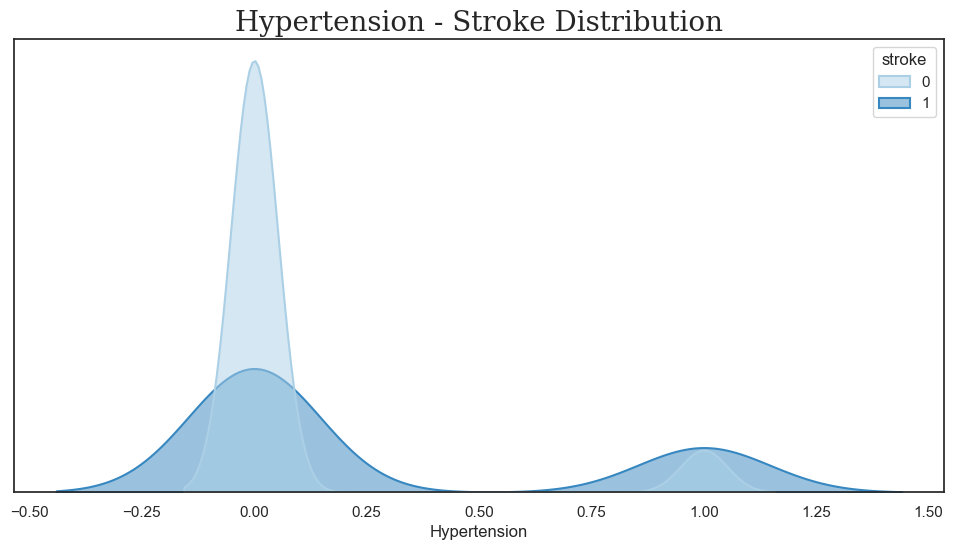

In [41]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white")
ax= sns.kdeplot(
   data=df, x="hypertension", hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

#usuwanie osi y
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

plt.xlabel('Hypertension')
plt.title('Hypertension - Stroke Distribution', fontsize = 20, fontfamily='serif')
pass

In [42]:
hyp_corr = np.corrcoef(df_copy["hypertension"], df["stroke"]) 
print (f"Calculated correlation between hypertension and Stroke: {round(hyp_corr[1, 0], 4)}.")
print ("It's one of the strongest correlated variable in this dataset.")

Calculated correlation between hypertension and Stroke: 0.1279.
It's one of the strongest correlated variable in this dataset.


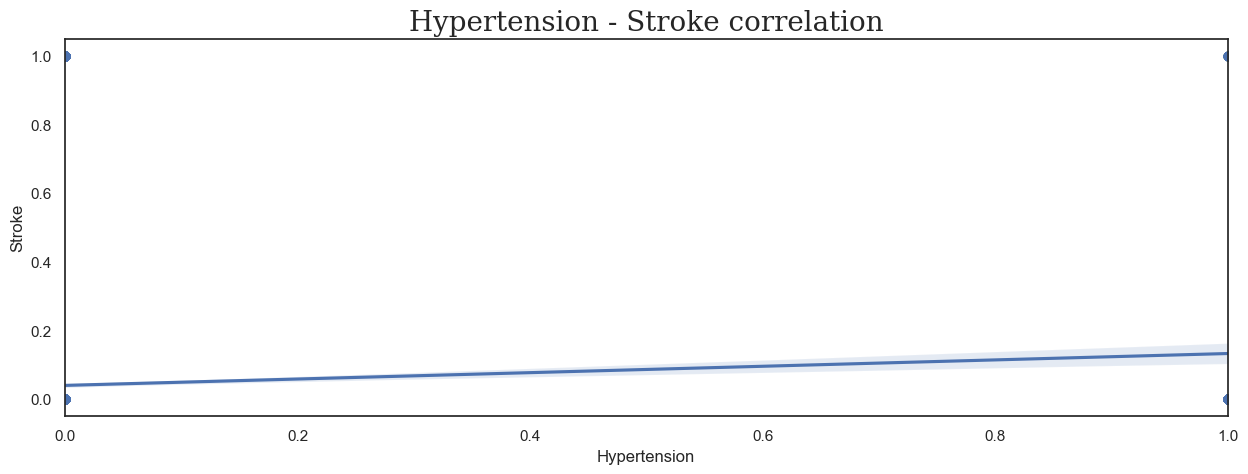

In [43]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x="hypertension", y="stroke", data=df_copy)
plt.xlabel("Hypertension")
plt.ylabel("Stroke")
plt.title("Hypertension - Stroke correlation", fontsize = 20, fontfamily = 'serif')
pass

## 4. "heart_disease"

In [44]:
df[["heart_disease"]].describe()

,heart_disease
count,5110.000000
mean,0.054012
std,0.226063
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [45]:
ishd = df[df["heart_disease"] == 1 ].count()
ishd_perc = round((ishd[0] * 100 / ges.count()),2)
isnthd = df[df["heart_disease"] == 0 ].count()
isnthd_perc = round((isnthd[0] * 100 / ges.count()),2)

In [46]:
print(f"{ishd[0]} patients ({ishd_perc}%) experienced heart disease,")
print(f"{isnthd[0]} patients ({isnthd_perc}%) didn't.")

276 patients (5.4%) experienced heart disease,
4834 patients (94.6%) didn't.


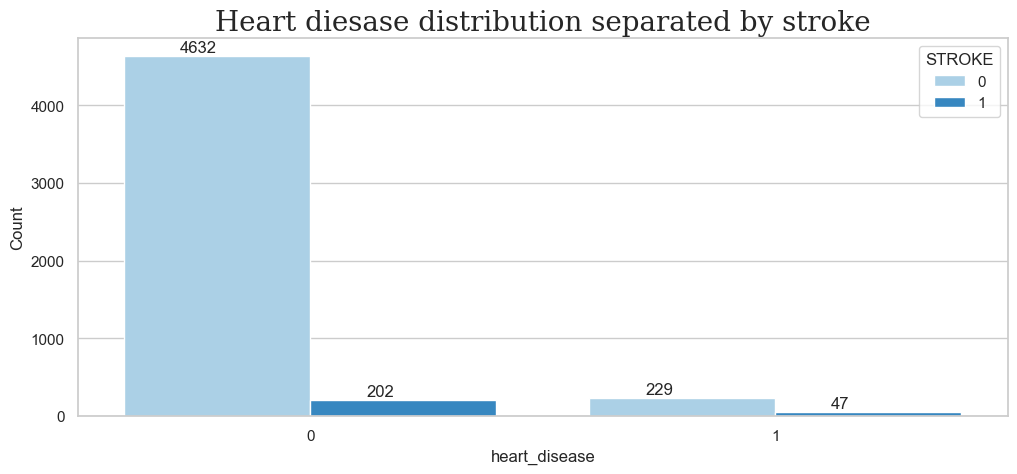

In [47]:
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='heart_disease',data=df, palette='Blues',hue='stroke', saturation =2.5)
plt.title("Heart diesase distribution separated by stroke", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))

ax.set(ylabel = "Count")
pass

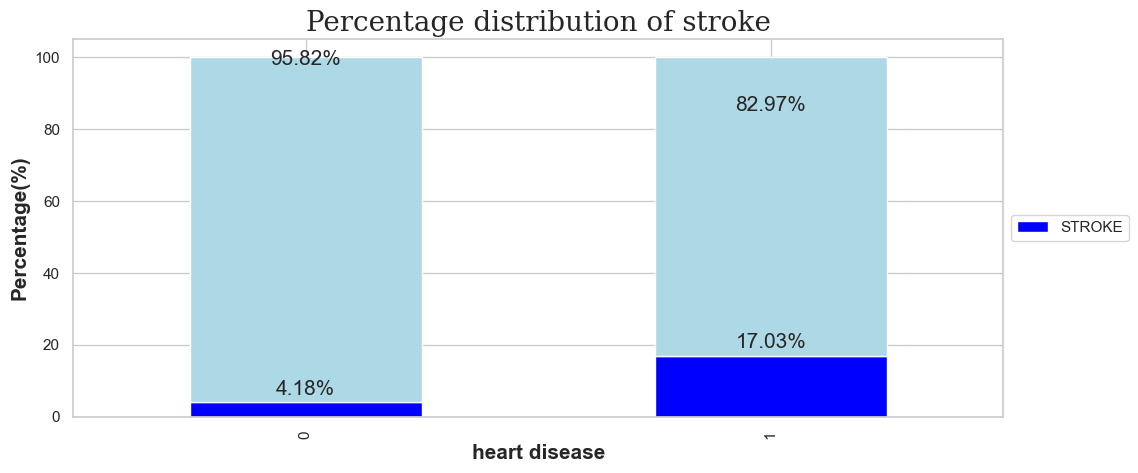

In [48]:
hd_file = pd.crosstab(df['heart_disease'], df['stroke'] == 0)
stacked_data_hd = hd_file.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")
ax = stacked_data_hd.plot(kind="bar", stacked=True, figsize = (12,5), color= ("blue", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20, fontfamily = 'serif')
plt.xlabel("heart disease", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    percentage = "{0:0.2f}%".format(p.get_height())
    x = p.get_x() + 0.25
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

Graphic comparison of stroke probability in relation to Heart disease (density plot):

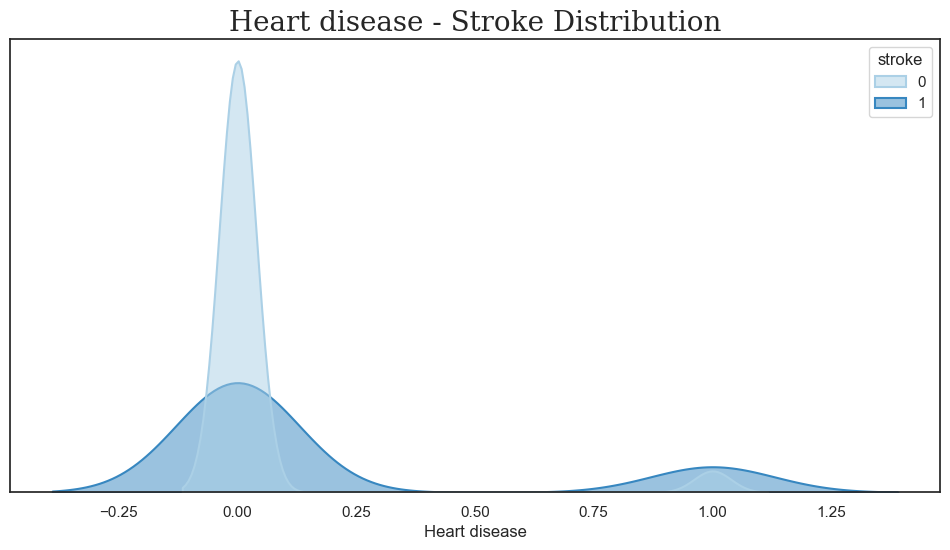

In [49]:
plt.figure(figsize = (12,6))
sns.set_theme(style="white")
ax= sns.kdeplot(
   data=df, x="heart_disease", hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

#usuwanie osi y
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

plt.xlabel('Heart disease')
plt.title('Heart disease - Stroke Distribution', fontsize = 20, fontfamily='serif')
pass

In [50]:
hde_corr = np.corrcoef(df_copy["heart_disease"], df["stroke"]) 
print (f"Calculated correlation between heart disease and Stroke: {round(hde_corr[1, 0], 4)}.")
print ("It's one of the strongest correlated variable in this dataset.")

Calculated correlation between heart disease and Stroke: 0.1349.
It's one of the strongest correlated variable in this dataset.


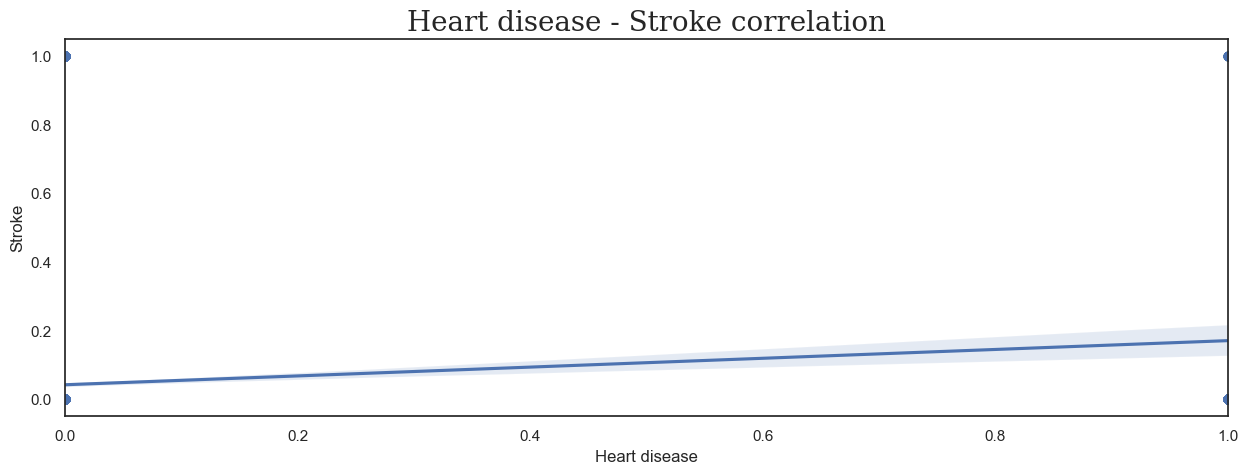

In [51]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x="heart_disease", y="stroke", data=df_copy)
plt.xlabel("Heart disease")
plt.ylabel("Stroke")
plt.title("Heart disease - Stroke correlation", fontsize = 20, fontfamily = 'serif')
pass

## 5. "ever_married"

In [52]:
df[["ever_married"]].describe()

,ever_married
count,5110
unique,2
top,Yes
freq,3353


In [53]:
married = df[df["ever_married"]=="Yes"].count()
married_perc = round((married[0] * 100 / ges.count()),2)
marriedudar = df[(df["ever_married"] == "Yes") & (df["stroke"] == 1)].count()
marriedudar_perc = round((marriedudar[0] * 100 / married[0]),2)

single = df[df["ever_married"]=="No"].count()
single_perc = round((single[0] * 100 / ges.count()),2)
singleudar = df[(df["ever_married"] == "No") & (df["stroke"] == 1)].count()
singleudar_perc = round((singleudar[0] * 100 / single[0]),2)

maturesingle = df[(df["ever_married"] == "No") & (df["age"] >= 18)].count()
maturesingle_perc = round((maturesingle[0] * 100 / single[0]),2)
maturesingleudar = df[(df["ever_married"] == "No") & (df["age"] >= 18) & (df["stroke"] == 1)].count()
maturesingleudar_perc = round((maturesingleudar[0] * 100 / maturesingle[0]),2)

In [54]:
print(f"{married[0]} patients ({married_perc}%) in dataset were ever in marriage.")
print(f"    {marriedudar[0]} of them had Stroke ({marriedudar_perc}%).")      
print(f"{single[0]} patients ({single_perc}%) were never married.")
print(f"    {singleudar[0]} of them had Stroke ({singleudar_perc}%).")
print(f"    There are {maturesingle[0]} mature singles ({maturesingle_perc}% of all singles),")
print(f"    {maturesingleudar[0]} of them had Stroke ({maturesingleudar_perc}% of mature singles).")

3353 patients (65.62%) in dataset were ever in marriage.
    220 of them had Stroke (6.56%).
1757 patients (34.38%) were never married.
    29 of them had Stroke (1.65%).
    There are 901 mature singles (51.28% of all singles),
    27 of them had Stroke (3.0% of mature singles).


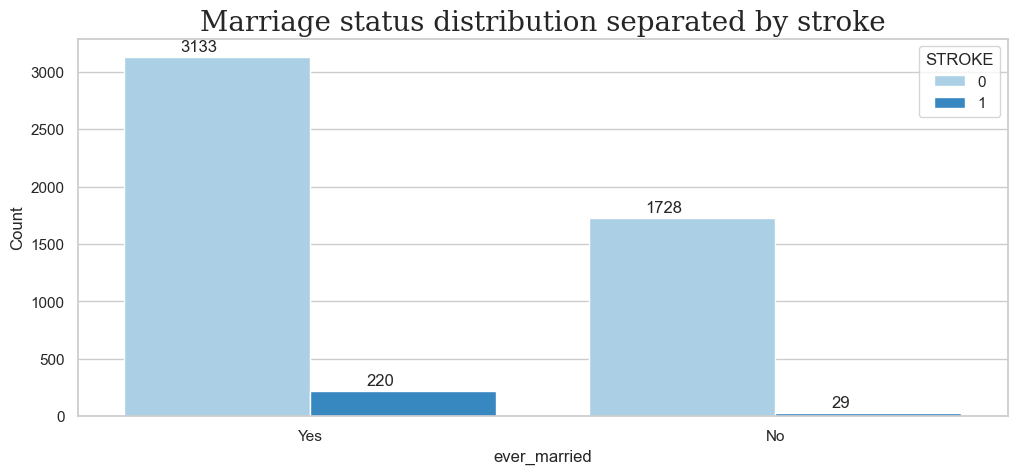

In [55]:
plt.figure(figsize=(12,5))
sns.set_theme(style="whitegrid")
ax=sns.countplot(x='ever_married',data=df, palette='Blues',hue='stroke', saturation =2.5)
plt.title("Marriage status distribution separated by stroke", fontsize = 20, fontfamily='serif')
plt.legend(title='STROKE', loc='upper right')

for p in ax.patches:
        ax.annotate('{0:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+50))

ax.set(ylabel = "Count")
pass

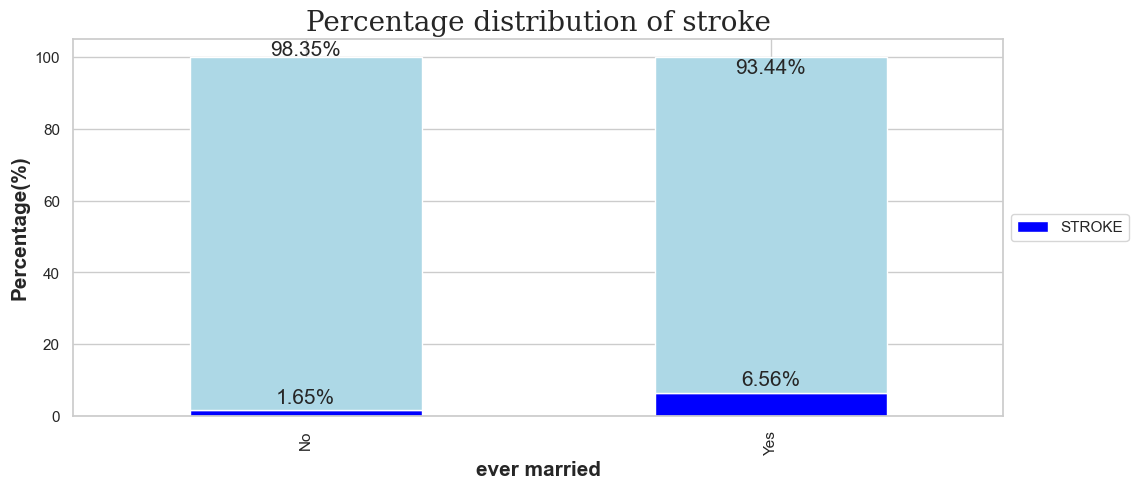

In [56]:
ema_file = pd.crosstab(df['ever_married'], df['stroke'] == 0)
stacked_data_ema = ema_file.apply(lambda x: x*100/sum(x), axis=1)
sns.set_theme(style="whitegrid")
ax = stacked_data_ema.plot(kind="bar", stacked=True, figsize = (12,5), color= ("blue", "lightblue"))
plt.title("Percentage distribution of stroke",fontsize=20, fontfamily = 'serif')
plt.xlabel("ever married", fontsize = 15, fontweight = "bold")
plt.ylabel("Percentage(%)", fontsize = 15, fontweight = "bold")
ax.legend(['STROKE'],loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    percentage = "{0:0.2f}%".format(p.get_height())
    x = p.get_x() + 0.25
    y = p.get_height() +2
    ax.annotate(percentage, (x,y), ha = "center", fontsize = 15)

Graphic comparison of stroke probability in relation to Heart disease (density plot):

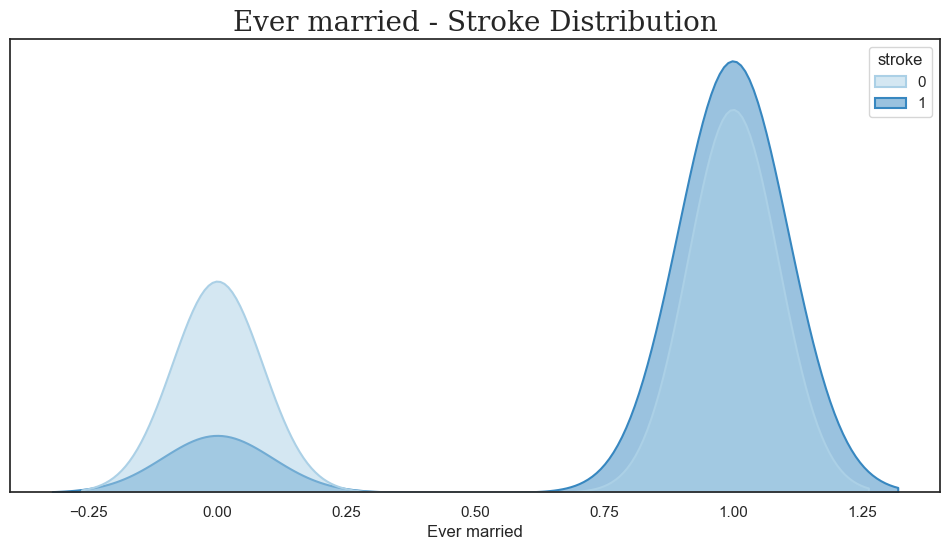

In [57]:
e_m_to_plot = le.fit_transform(df["ever_married"])
plt.figure(figsize = (12,6))
sns.set_theme(style="white")
ax= sns.kdeplot(
   data=df, x=e_m_to_plot, hue="stroke",
   fill=True, common_norm=False, palette="Blues",
   alpha=.5, linewidth=1.5)

#usuwanie osi y
ax.set(yticklabels=[])
ax.set(ylabel=None) 
ax.tick_params(left=False)

plt.xlabel('Ever married')
plt.title('Ever married - Stroke Distribution', fontsize = 20, fontfamily='serif')
pass

In [58]:
sma_corr = np.corrcoef(le.fit_transform(df_copy["ever_married"]), df["stroke"]) 
print (f"Calculated correlation between marriage status and Stroke: {round(sma_corr[1, 0], 4)}.")
print ("It's one of the strongest correlated variable.")

Calculated correlation between marriage status and Stroke: 0.1083.
It's one of the strongest correlated variable.


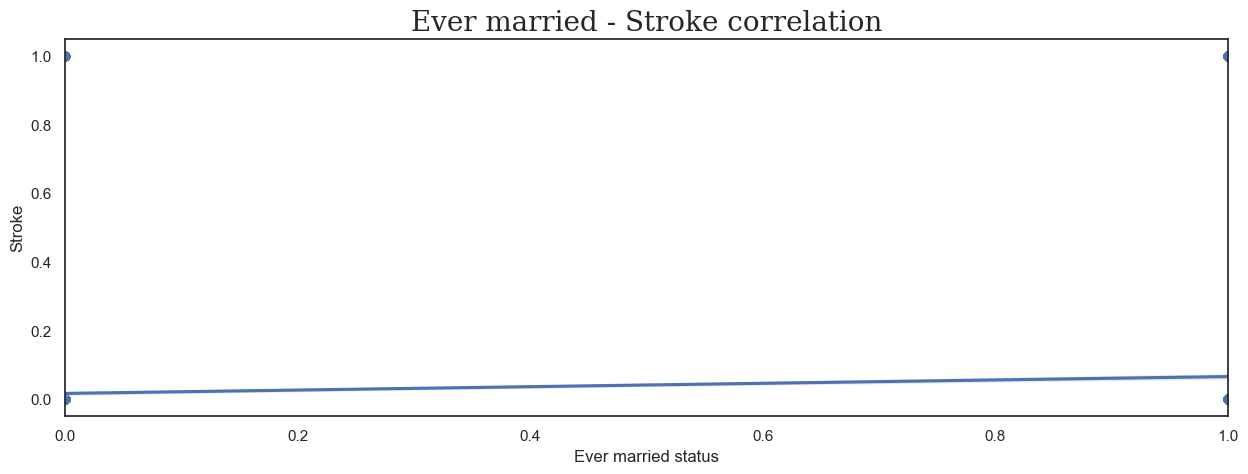

In [59]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x=le.fit_transform(df_copy["ever_married"]), y="stroke", data=df_copy)
plt.xlabel("Ever married status")
plt.ylabel("Stroke")
plt.title("Ever married - Stroke correlation", fontsize = 20, fontfamily = 'serif')
pass

# End of part one
## thanks for your attention





_Jonasz_